In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [46]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [4]:
train.shape

(550068, 12)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text xticklabel objects>)

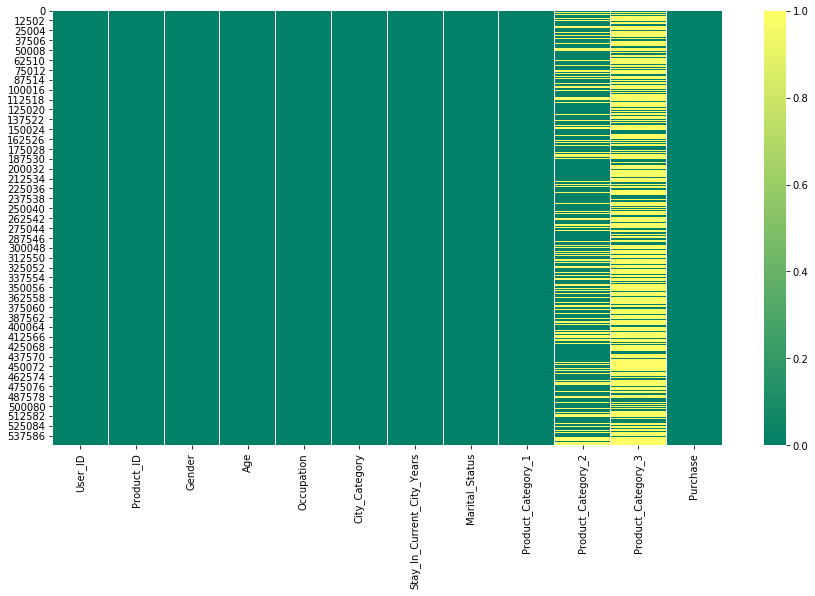

In [5]:
plt.figure(figsize=(15,8))
sns.heatmap(train.isnull(),cmap='summer')
plt.xticks(rotation='90')

In [6]:
train.isnull().sum()[train.isnull().sum() != 0]

Product_Category_2    173638
Product_Category_3    383247
dtype: int64

In [7]:
train.isnull().sum()[train.isnull().sum() != 0] / train.shape[0] *100

Product_Category_2    31.566643
Product_Category_3    69.672659
dtype: float64

## Test Data

In [9]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [8]:
test.shape

(233599, 11)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text xticklabel objects>)

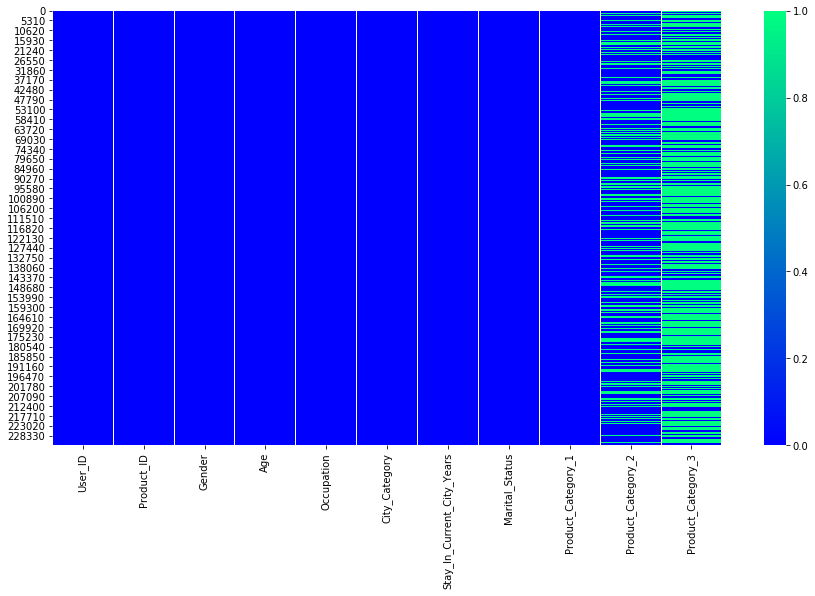

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(test.isnull(),cmap='winter')
plt.xticks(rotation=90)

In [9]:
test.isnull().sum()[test.isnull().sum() != 0]

Product_Category_2     72344
Product_Category_3    162562
dtype: int64

In [10]:
test.isnull().sum()[test.isnull().sum() != 0] / test.shape[0] * 100

Product_Category_2    30.969311
Product_Category_3    69.590195
dtype: float64

# Finding new realtionships between features and label
## Categorized UserID based on their purchasing power

In [13]:
user_id_mapping = {}
tot_purchase_per_customer = train.groupby('User_ID')['Purchase'].sum()

In [14]:
values = tot_purchase_per_customer.iteritems()
np.percentile(tot_purchase_per_customer,[10,20,30,40,50,60,70,80,90,100])

array([  146570.,   205272.,   279288.,   383455.,   521213.,   698842.,
         942900.,  1355245.,  2069404., 10536909.])

In [15]:
for key, value in values:
    if value <= 146570:
        user_id_mapping[key] = 1
    elif value <= 205272:
        user_id_mapping[key] = 2
    elif value <= 279288:
        user_id_mapping[key] = 3
    elif value <= 383455:
        user_id_mapping[key] = 4
    elif value <= 521213:
        user_id_mapping[key] = 5
    elif value <= 698842:
        user_id_mapping[key] = 6
    elif value <= 942900:
        user_id_mapping[key] =7
    elif value <= 1355245:
        user_id_mapping[key] = 8
    elif value <= 2069404:
        user_id_mapping[key] = 9
    else:
        user_id_mapping[key] = 10

In [16]:
def get_customer_category(user_id):
    if user_id in user_id_mapping:
        return user_id_mapping[user_id]
#     return user_id_mapping[user_id]

In [104]:
train['User_Category'] = [get_customer_category(train['User_ID'][i]) for i in train.index]

In [105]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_Category
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,4
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,4
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,4
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,4
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,7


In [109]:
test['User_Category'] = [get_customer_category(test['User_ID'][i]) for i in test.index]

In [108]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,User_Category
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,3
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,6
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,10
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,10
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,6


## Categorized User based on their average purchase


In [11]:
user_id_mapping = {}
avg_purchase_per_customer = train.groupby('User_ID')['Purchase'].mean()

In [12]:
values = avg_purchase_per_customer.iteritems()

In [13]:
np.percentile(avg_purchase_per_customer,[5,20,50,85,100])

array([ 6828.02413672,  8018.80310881,  9386.20833333, 11419.2365942 ,
       18577.89361702])

In [14]:
for key, val in values:
    if val <=6828:
        user_id_mapping[key] = 1
    elif val <= 8018:
        user_id_mapping[key] = 2
    elif val <= 9386:
        user_id_mapping[key] = 3
    elif val <= 11419:
        user_id_mapping[key] = 4
    else:
        user_id_mapping[key] = 5
    

In [15]:
def get_customer_category(user_id):
    if user_id in user_id_mapping:
        return user_id_mapping[user_id]

In [16]:
train['User_Category'] =[get_customer_category(train['User_ID'][i]) for i in train.index]

In [17]:
test['User_Category'] = [get_customer_category(test['User_ID'][i]) for i in test.index]

In [18]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_Category
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,4
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,4
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,4
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,4
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,4


# Product_ID based on their average purchase

In [19]:
product_id_mapping = {}
product_id_avg_purchase = train.groupby('Product_ID')['Purchase'].mean()

In [20]:
values = product_id_avg_purchase.iteritems()

In [21]:
np.percentile(product_id_avg_purchase,[30,60,75,90,100])

array([ 5794.23012552,  7529.68518519, 10154.06579061, 14020.03030303,
       21256.50549451])

In [22]:
for key,val in values:
    if val <= 5794:
        product_id_mapping[key] = 1
    elif val <= 7529:
        product_id_mapping[key] = 2
    elif val <= 10154:
        product_id_mapping[key] = 3
    elif val <= 14020:
        product_id_mapping[key] = 4
    else:
        product_id_mapping[key] = 5

In [23]:
def get_product_category(product_id):
    for product_id in product_id_mapping:
        return product_id_mapping[product_id]

In [24]:
train['Product_Category'] = [get_product_category(train.Product_ID[i]) for i in train.index] 
test['Product_Category'] = [get_product_category(test.Product_ID[i]) for i in test.index]

# product category 1 based on their average purchase

In [25]:
product_category_1_mapping = {}
product_category_1 = train.groupby('Product_Category_1')['Purchase'].mean()

In [26]:
np.percentile(product_category_1,[10,20,30,40,50,60,70,80,90,100])

array([  687.2086691 ,  2133.89957167,  4171.54721546,  6995.41011789,
       10133.73262475, 12007.81152577, 13954.16412797, 14931.83658459,
       15891.19965477, 19675.57092683])

In [27]:
for key, val in product_category_1.iteritems():
    if val <= 687:
        product_category_1_mapping[key] = 1
    elif val <= 2133:
        product_category_1_mapping[key] = 2
    elif val <= 4171:
        product_category_1_mapping[key] = 3
    elif val <= 6995:
        product_category_1_mapping[key] = 4
    elif val <= 10133:
        product_category_1_mapping[key] = 5
    elif val <= 12007:
        product_category_1_mapping[key] = 6
    elif val <= 13954:
        product_category_1_mapping[key] = 7
    elif val <= 14931:
        product_category_1_mapping[key] = 8
    elif val <= 15891:
        product_category_1_mapping[key] = 9
    else:
        product_category_1_mapping[key] = 10

In [70]:
def get_product_category_1(product_category):
    for product_category in product_category_1_mapping:
        return product_category_1_mapping[product_category]

In [71]:
train['Product_1'] = [get_product_category_1(train.Product_Category_1[i]) for i in train.index]
test['Product_1'] = [get_product_category_1(test.Product_Category_1[i]) for i in test.index]

In [72]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_Category,Product_Category,Product_1
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,4,4,7
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,4,4,7
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,4,4,7
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,4,4,7
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,4,4,7


In [73]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,User_Category,Product_Category,Product_1
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,5,4,7
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,4,4,7
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,4,4,7
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,4,4,7
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,2,4,7


# merge train and test data and handling missing values

In [29]:
data = pd.concat([train, test],sort = False)

In [30]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_Category,Product_Category
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,4,4
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,4,4
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,4,4
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,4,4
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,4,4


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]), <a list of 14 Text xticklabel objects>)

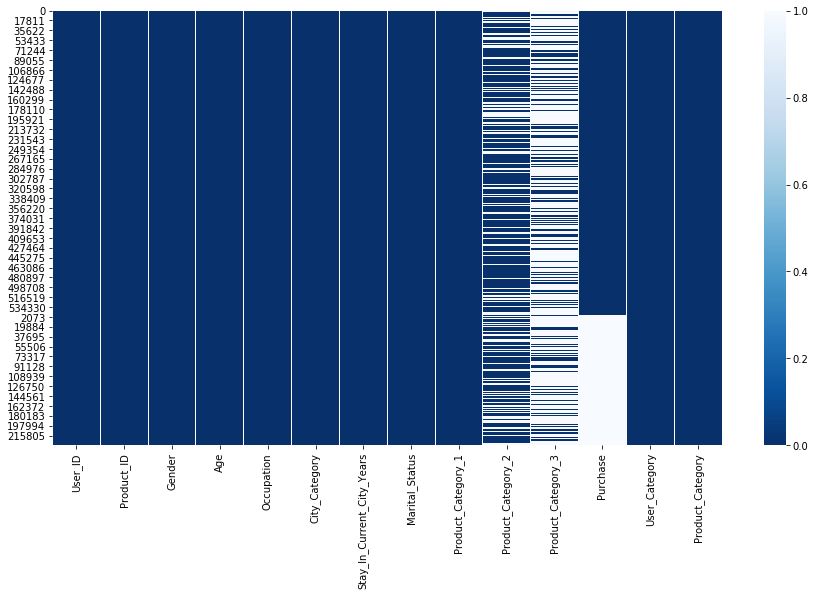

In [31]:
plt.figure(figsize=(15,8))
sns.heatmap(data.isnull(),cmap='Blues_r')
plt.xticks(rotation = 90)

In [32]:
data.isnull().sum()[data.isnull().sum() != 0][:-1] / data.shape[0] *100

Product_Category_2    31.388587
Product_Category_3    69.648078
dtype: float64

In [33]:
data.dtypes.value_counts()

int64      6
object     5
float64    3
dtype: int64

# Handling Missing Values

In [34]:
data = data.fillna(0)

In [35]:
data.isnull().sum()[data.isnull().sum() != 0]

Series([], dtype: int64)

# EDA

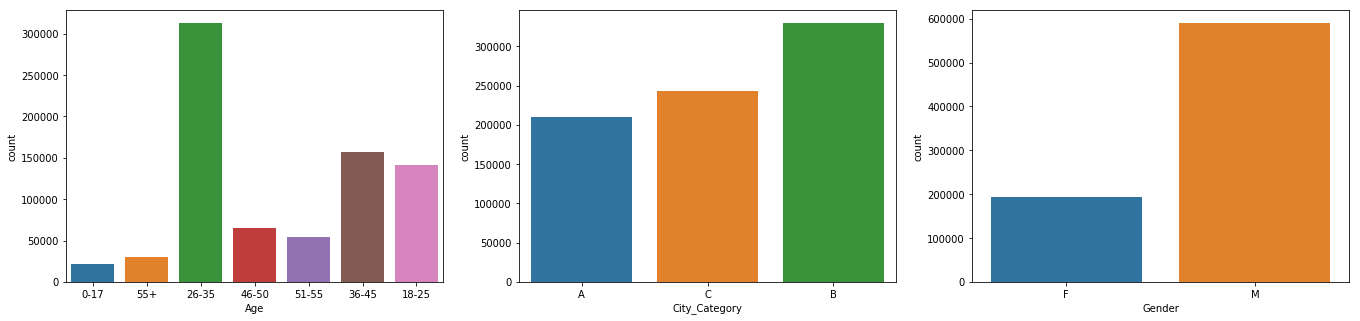

In [26]:
plt.figure(figsize=(23,5))

plt.subplot2grid((1,3), (0,0))
sns.countplot(data['Age'])

plt.subplot2grid((1,3), (0,1))
sns.countplot(data['City_Category'])

plt.subplot2grid((1,3), (0,2))
sns.countplot(data['Gender'])


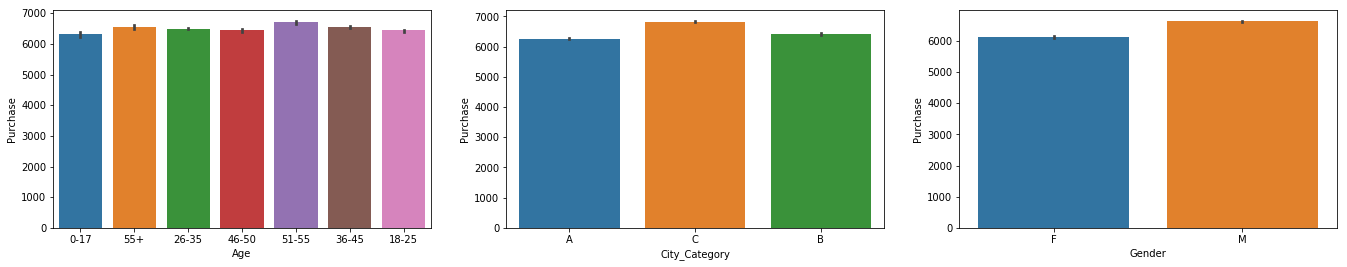

In [29]:
plt.figure(figsize=(23,4))

plt.subplot2grid((1,3),(0,0))
sns.barplot('Age','Purchase',data=data)

plt.subplot2grid((1,3),(0,1))
sns.barplot('City_Category','Purchase',data=data)

plt.subplot2grid((1,3),(0,2))
sns.barplot('Gender','Purchase',data=data)

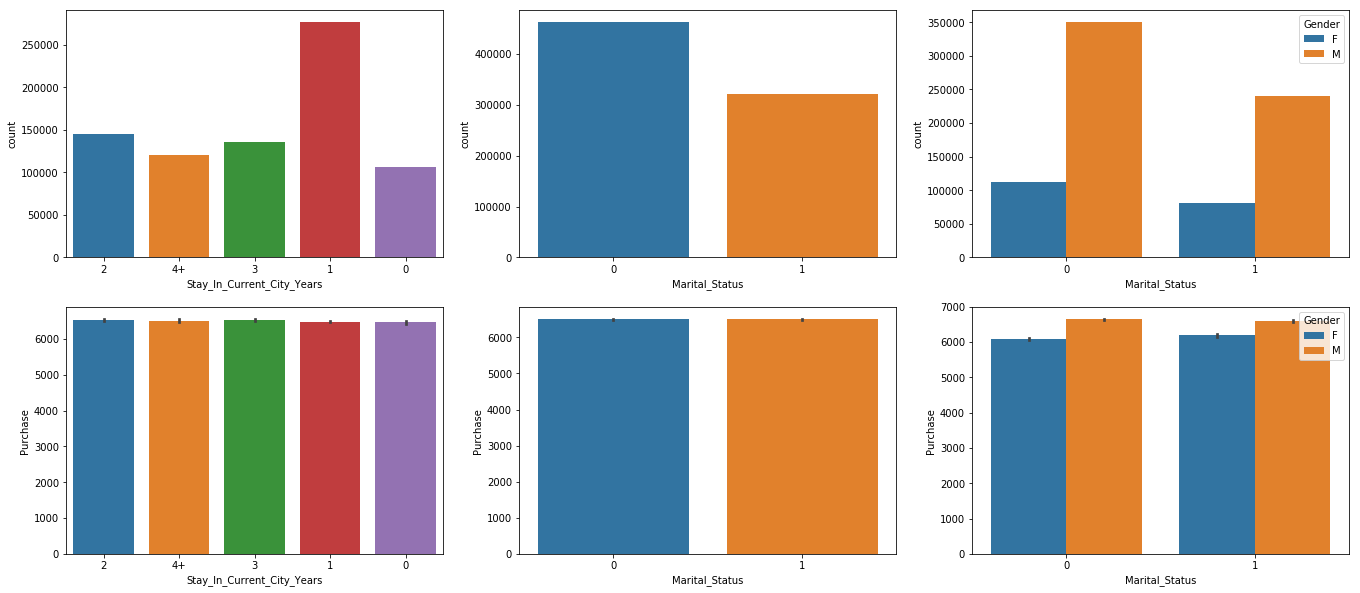

In [27]:
plt.figure(figsize=(23,10))

plt.subplot2grid((2,3),(0,0))
sns.countplot(data.Stay_In_Current_City_Years)

plt.subplot2grid((2,3),(0,1))
sns.countplot(data.Marital_Status)

plt.subplot2grid((2,3),(0,2))
sns.countplot(data.Marital_Status,hue=data.Gender)

plt.subplot2grid((2,3),(1,0))
sns.barplot(data.Stay_In_Current_City_Years,data.Purchase)

plt.subplot2grid((2,3),(1,1))
sns.barplot(data.Marital_Status,data.Purchase)

plt.subplot2grid((2,3),(1,2))
sns.barplot(data.Marital_Status,data.Purchase,hue=data.Gender)

AttributeError: 'DataFrame' object has no attribute 'Marital_Status'

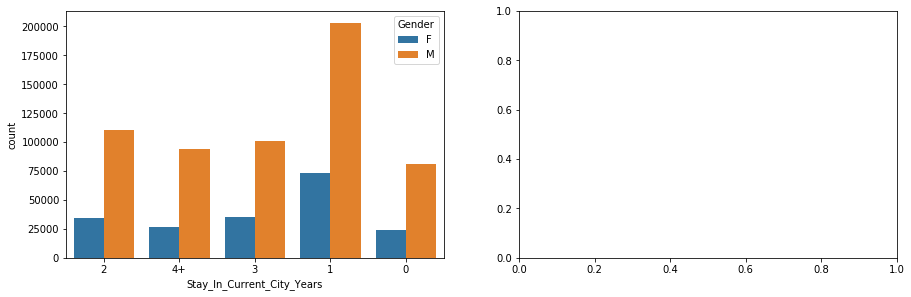

In [30]:
plt.figure(figsize=(23,10))

plt.subplot2grid((2,3),(0,0))
sns.countplot(data.Stay_In_Current_City_Years,hue=data.Gender)

plt.subplot2grid((2,3),(0,1))
sns.countplot(data.Stay_In_Current_City_Years,hue=data.Marital_Status)

plt.subplot2grid((2,3),(0,2))
sns.countplot(data.Stay_In_Current_City_Years,hue=data.City_Category)

plt.subplot2grid((2,3),(1,0))
sns.barplot(data.Stay_In_Current_City_Years,data.Purchase,hue=data.Gender)

plt.subplot2grid((2,3),(1,1))
sns.barplot(data.Stay_In_Current_City_Years,data.Purchase,hue=data.Marital_Status)

plt.subplot2grid((2,3),(1,2))
sns.barplot(data.Stay_In_Current_City_Years,data.Purchase,hue=data.City_Category)


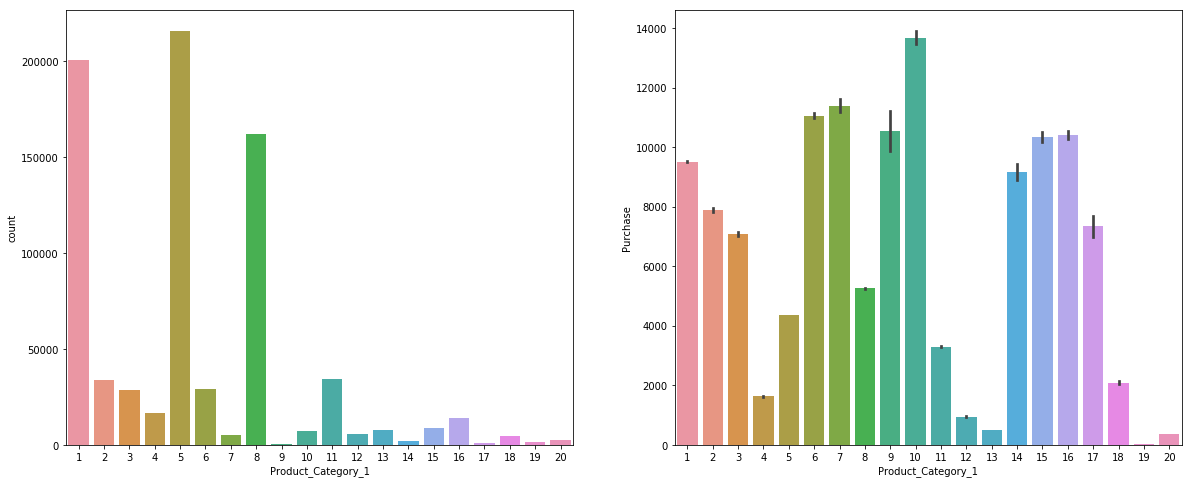

In [47]:
plt.figure(figsize=(20,8))

plt.subplot2grid((1,2),(0,0))
sns.countplot(data.Product_Category_1)

plt.subplot2grid((1,2),(0,1))
sns.barplot(data.Product_Category_1,data.Purchase)

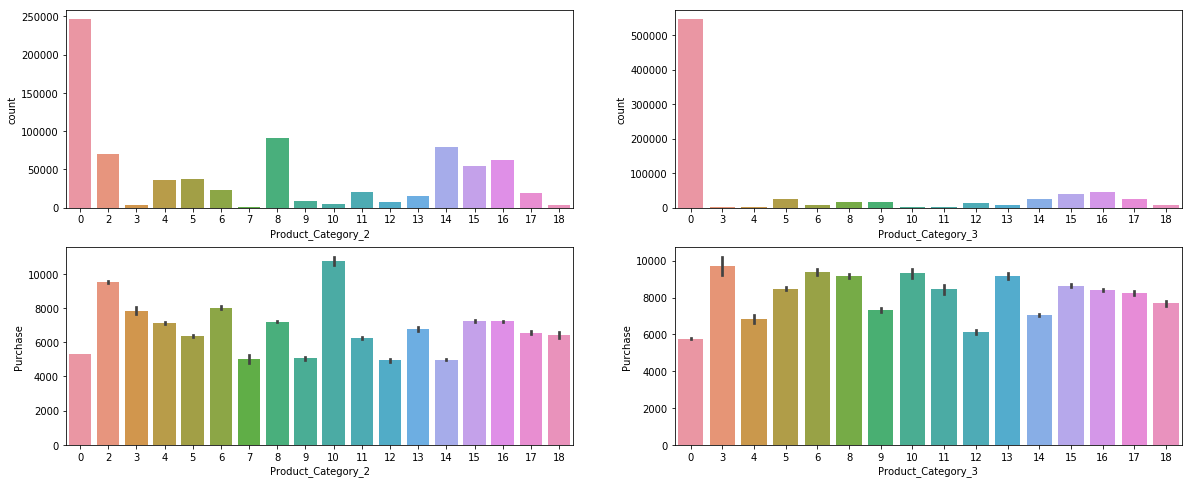

In [49]:
plt.figure(figsize=(20,8))

plt.subplot2grid((2,2),(0,0))
sns.countplot(data.Product_Category_2.astype(int))

plt.subplot2grid((2,2),(0,1))
sns.countplot(data.Product_Category_3.astype(int))

plt.subplot2grid((2,2),(1,0))
sns.barplot(data.Product_Category_2.astype(int),data.Purchase)

plt.subplot2grid((2,2),(1,1))
sns.barplot(data.Product_Category_3.astype(int),data.Purchase)


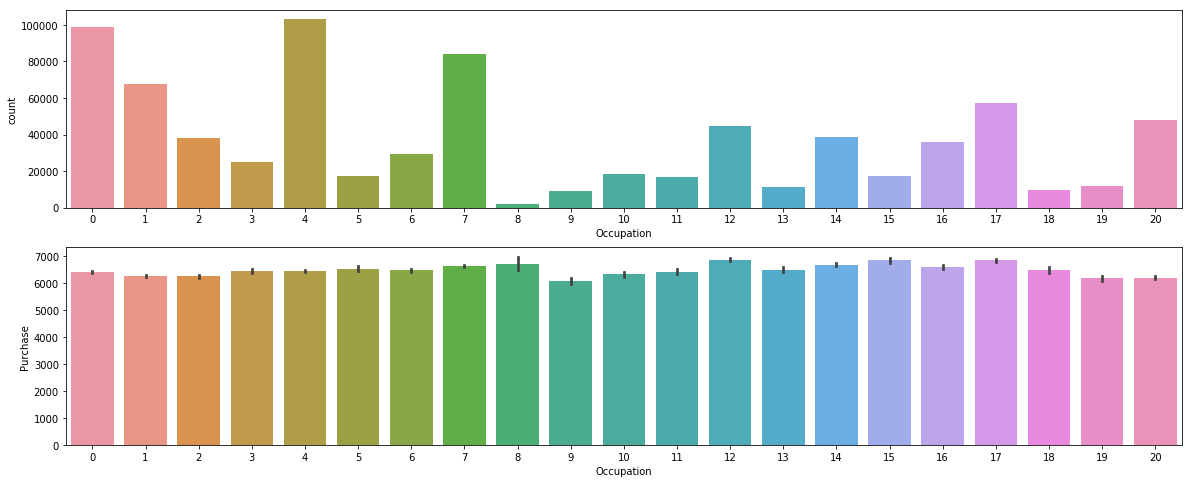

In [50]:
plt.figure(figsize=(20,8))

plt.subplot2grid((2,1),(0,0))
sns.countplot(data.Occupation)

plt.subplot2grid((2,1),(1,0))
sns.barplot(data.Occupation,data.Purchase)

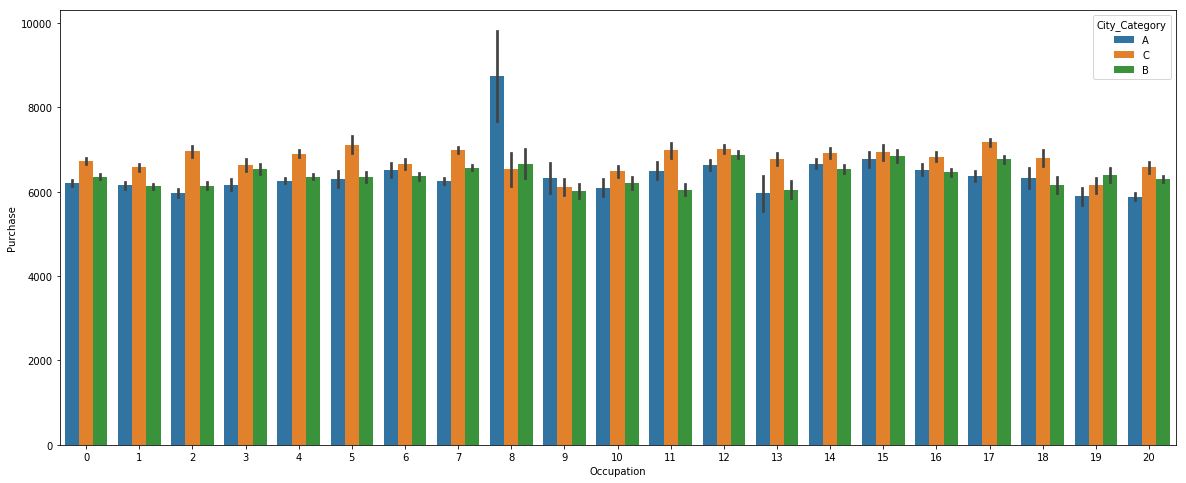

In [51]:
plt.figure(figsize=(20,8))
sns.barplot(data.Occupation,data.Purchase,hue=data.City_Category)

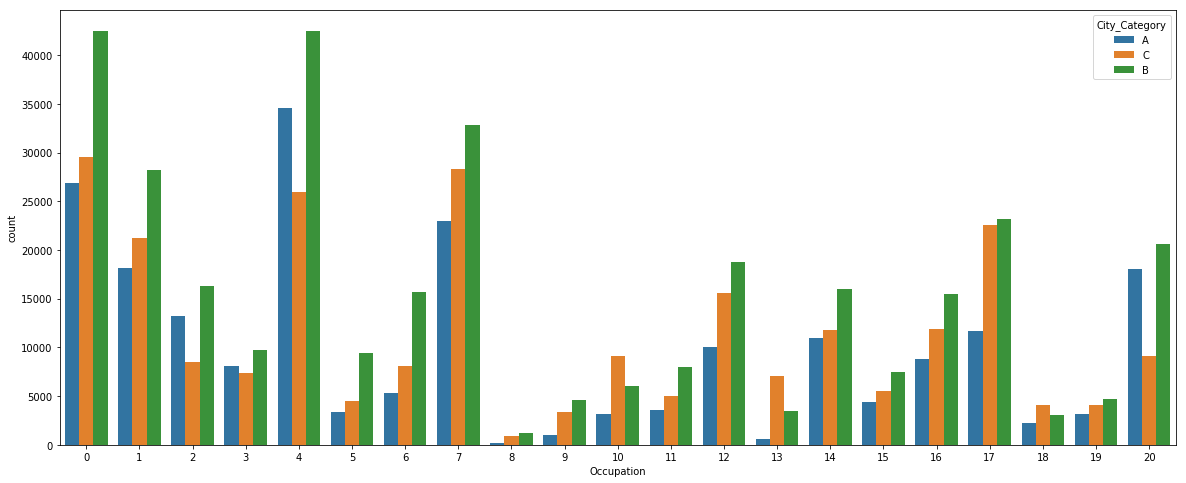

In [53]:
plt.figure(figsize=(20,8))
sns.countplot(data.Occupation,hue=data.City_Category)

# Data Pre Processing

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['Gender'] = le.fit_transform(data['Gender'])

In [71]:
data['Product_Category_3'] = data.Product_Category_3.astype(int)
data['Product_Category_2'] = data.Product_Category_2.astype(int)

In [72]:
data.drop(['User_ID','Product_ID','Marital_Status','Occupation'],axis=1,inplace=True)

KeyError: "['User_ID' 'Product_ID' 'Marital_Status' 'Occupation'] not found in axis"

In [80]:
data = pd.get_dummies(data,columns=['Age','City_Category','Stay_In_Current_City_Years','Product_Category_1','Product_Category_2','Product_Category_3'],drop_first=True)

In [81]:
train_split = data.iloc[:train.shape[0]]

In [82]:
test_split = data.iloc[train.shape[0]:]

In [83]:
train_split.head()

,Gender,Purchase,User_Category,Product_Category,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,...,Product_Category_3_9,Product_Category_3_10,Product_Category_3_11,Product_Category_3_12,Product_Category_3_13,Product_Category_3_14,Product_Category_3_15,Product_Category_3_16,Product_Category_3_17,Product_Category_3_18
0,0,8370.0,4,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,15200.0,4,4,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1422.0,4,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1057.0,4,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,7969.0,4,4,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#### Detect and Remove Outliers

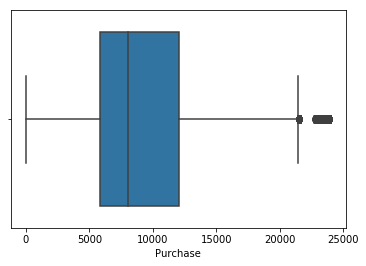

In [84]:
sns.boxplot(train_split['Purchase'])

In [85]:
def detect_outliers(df):
    q1, q3 = np.percentile(df,[25,75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    return lower_bound,upper_bound

In [86]:
detect_outliers(train_split.Purchase)

(-3523.5, 21400.5)

In [87]:
train_split = train_split[train_split['Purchase'] < 21400.5]
train_split.shape

(547391, 67)

In [88]:
train.shape

(550068, 12)

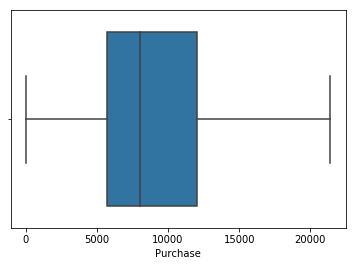

In [89]:
sns.boxplot(train_split.Purchase)

In [90]:
X = train_split.drop('Purchase',axis=1)
y = train_split['Purchase']

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.33, random_state=19)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(366751, 66) (180640, 66) (366751,) (180640,)


In [75]:
train_split.head()

,Gender,Age,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_Category,Product_Category
0,0,0-17,A,2,3,0,0,8370.0,4,4
1,0,0-17,A,2,1,6,14,15200.0,4,4
2,0,0-17,A,2,12,0,0,1422.0,4,4
3,0,0-17,A,2,12,14,0,1057.0,4,4
4,1,55+,C,4+,8,0,0,7969.0,4,4


In [98]:
from sklearn.tree import DecisionTreeRegressor
t = DecisionTreeRegressor()
t.fit(X_train,y_train)
y_pred = t.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
print('Decision Tree R2 Score:',r2_score(y_test,y_pred))
print('Decision Tree MSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

Decision Tree R2 Score: 0.6163391915022651
Decision Tree MSE: 3053.2257653272513


In [99]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
print('Random Forest R2 Score:',r2_score(y_test,y_pred))
print('Random Forest MSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

Random Forest R2 Score: 0.6451273252445109
Random Forest MSE: 2936.4423554358928


In [100]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
print('Linear Regression R2 Score:',r2_score(y_test,y_pred))
print('Linear Regression MSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

Linear Regression R2 Score: 0.6631218787228859
Linear Regression MSE: 2861.024672280889


In [112]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lr,X_train,y_train,cv=10,scoring='neg_mean_squared_error')

In [113]:
score

array([-8094813.00512256, -8189125.53796864, -8258407.87839809,
       -8267495.79479891, -8228823.21760054, -8361029.91254942,
       -8301730.95492843, -8230047.4425835 , -8117253.0335242 ,
       -8278075.32967962])

In [117]:
np.sqrt(-score).mean()

2869.23324929118

In [118]:
scores = cross_val_score(lr,X_test,y_test,cv=10,scoring='neg_mean_squared_error')

In [119]:
np.sqrt(-scores).mean()

2861.3430987916176

In [50]:
age = pd.get_dummies(data.Age,drop_first=True)
city_category = pd.get_dummies(data.City_Category,drop_first=True)
stay_years = pd.get_dummies(data.Stay_In_Current_City_Years,drop_first=True)
pc1 = pd.get_dummies(data.Product_Category_1,drop_first=True)
pc2 = pd.get_dummies(data.Product_Category_2,drop_first=True)
pc3 = pd.get_dummies(data.Product_Category_3,drop_first=True)

In [52]:
user_category.head()

NameError: name 'user_category' is not defined

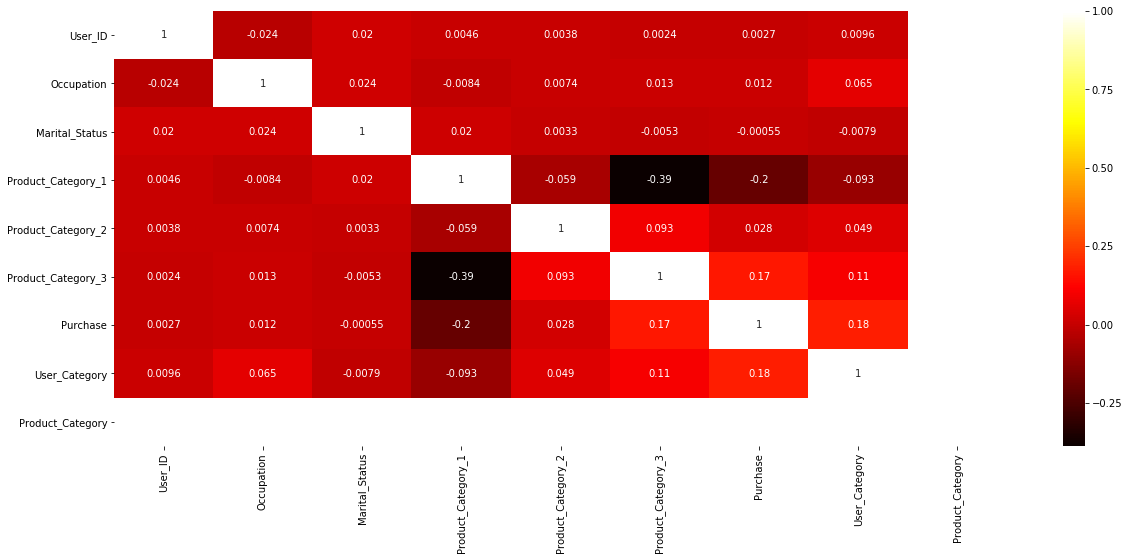

In [61]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot=True,cmap='hot')

In [3]:
bf_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
bf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
bf_train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [6]:
bf_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
bf_train.Product_Category_2.value_counts(dropna=False)

NaN     173638
8.0      64088
14.0     55108
2.0      49217
16.0     43255
15.0     37855
5.0      26235
4.0      25677
6.0      16466
11.0     14134
17.0     13320
13.0     10531
9.0       5693
12.0      5528
10.0      3043
3.0       2884
18.0      2770
7.0        626
Name: Product_Category_2, dtype: int64

In [10]:
bf_train.Product_Category_3.value_counts(dropna=False)

NaN     383247
16.0     32636
15.0     28013
14.0     18428
17.0     16702
5.0      16658
8.0      12562
9.0      11579
12.0      9246
13.0      5459
6.0       4890
18.0      4629
4.0       1875
11.0      1805
10.0      1726
3.0        613
Name: Product_Category_3, dtype: int64

In [17]:
bf_train.Product_Category_2.fillna(method = 'bfill',inplace=True)

In [16]:
bf_train.Product_Category_3.fillna(method = 'bfill',inplace=True)

In [14]:
bf_train.Product_Category_2.value_counts(dropna=False)

8.0     97555
14.0    82426
2.0     69947
16.0    62388
15.0    51669
5.0     38386
4.0     36206
6.0     23894
11.0    21511
17.0    20206
13.0    15725
12.0     8415
9.0      8142
10.0     4417
18.0     4208
3.0      3941
7.0      1031
NaN         1
Name: Product_Category_2, dtype: int64

In [18]:
bf_train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [22]:
bf_test.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
User_ID,1.000000,-0.023988,0.019883,0.006428,0.004065,0.000316
Occupation,-0.023988,1.000000,0.021872,-0.010465,-0.001685,0.003838
Marital_Status,0.019883,0.021872,1.000000,0.018860,0.021766,0.016119
Product_Category_1,0.006428,-0.010465,0.018860,1.000000,0.540063,0.225054
Product_Category_2,0.004065,-0.001685,0.021766,0.540063,1.000000,0.543417
Product_Category_3,0.000316,0.003838,0.016119,0.225054,0.543417,1.000000


In [26]:
bf_test.Product_Category_3.fillna(method = 'ffill',inplace=True)

In [24]:
bf_test.Product_Category_2.fillna(method = 'bfill',inplace=True)

In [27]:
bf_test.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [35]:
X = bf_train.drop(['User_ID','Purchase','Product_ID'],axis = 1)
y = bf_train['Purchase']

In [45]:
Xt = bf_test.drop(['User_ID','Product_ID'],axis = 1)

In [36]:
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,F,0-17,10,A,2,0,3,6.0,14.0
1,F,0-17,10,A,2,0,1,6.0,14.0
2,F,0-17,10,A,2,0,12,6.0,14.0
3,F,0-17,10,A,2,0,12,14.0,14.0
4,M,55+,16,C,4+,0,8,14.0,14.0


In [46]:
Xt2 = pd.get_dummies(Xt,columns = ['Gender','Age','City_Category','Stay_In_Current_City_Years'],drop_first=True)

In [39]:
X1 = pd.get_dummies(X,columns = ['Gender','Age','City_Category','Stay_In_Current_City_Years'],drop_first=True)

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y,random_state=19)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,y_pred))


4701.628989303521

In [47]:
lr.predict(Xt)

ValueError: could not convert string to float: 'M'